# InSituPy demonstration - Performance tests

In [1]:
## The following code ensures that all functions and init files are reloaded before executions.
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
from insitupy import read_xenium
from datetime import datetime
import shutil
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
import geopandas as gpd
import shapely

## Load Xenium data into `InSituData` object

In [4]:
insitupy_project = Path("../demo_dataset/demo_insitupy_project")

In [5]:
data = read_xenium(insitupy_project)

In [6]:
data.load_cells()
data.load_images()

Loading cells...
	No alternative cells found...
Loading images...


In [7]:
data

InSituData
Method:		Xenium
Slide ID:	0001879
Sample ID:	Replicate 1
Path:		C:\Users\ge37voy\Github\InSituPy\notebooks\demo_dataset\demo_insitupy_project
Metadata file:	.ispy
    ➤ images
       nuclei:	(25778, 35416)
       CD20:	(25778, 35416)
       HER2:	(25778, 35416)
       HE:	(25778, 35416, 3)
    ➤ cells
       matrix
           AnnData object with n_obs × n_vars = 167780 × 313
           obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'annotation-demo', 'annotation-demo2', 'dist_from_points'
           var: 'gene_ids', 'feature_types', 'genome'
           obsm: 'spatial'
           varm: 'binned_expression'
       boundaries
           BoundariesData object with 2 entries:
               cellular
               nuclear

In [8]:
data.show()

Invalid schema for package 'ome-types', please run 'npe2 validate ome-types' to check for manifest errors.


Invalid schema for package 'ome-types', please run 'npe2 validate ome-types' to check for manifest errors.


In [9]:
data.store_annotations()

Added 2 new annotations to key 'TestKey'
Added 4 new annotations to existing key 'TestKey'


In [11]:
data

InSituData
Method:		Xenium
Slide ID:	0001879
Sample ID:	Replicate 1
Path:		C:\Users\ge37voy\Github\InSituPy\notebooks\demo_dataset\demo_insitupy_project
Metadata file:	.ispy
    ➤ images
       nuclei:	(25778, 35416)
       CD20:	(25778, 35416)
       HER2:	(25778, 35416)
       HE:	(25778, 35416, 3)
    ➤ cells
       matrix
           AnnData object with n_obs × n_vars = 167780 × 313
           obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'annotation-demo', 'annotation-demo2', 'dist_from_points'
           var: 'gene_ids', 'feature_types', 'genome'
           obsm: 'spatial'
           varm: 'binned_expression'
       boundaries
           BoundariesData object with 2 entries:
               cellular
               nuclear
    ➤ annotations
       TestKey:	6 annotations, 1 class ('TestClass') 

In [13]:
x = data.cells.matrix.obsm["spatial"][:, 0]
y = data.cells.matrix.obsm["spatial"][:, 1]
cells = gpd.points_from_xy(x, y)

In [26]:
data.annotations.TestKey

,objectType,geometry,name,color,scale,layer_type,origin
id,,,,,,,
e2218a13-c5b7-4e88-8bdb-0cd45fedbc89,annotation,"POLYGON ((8008.08330 10589.18330, 8589.51976 1...",TestClass,"[255, 0, 0]","[0.2125, 0.2125]",Shapes,manual
97a15baa-0979-4f48-ae26-ed7c5391ab76,annotation,"POLYGON ((13611.01644 10113.46257, 14192.45289...",TestClass,"[255, 0, 0]","[0.2125, 0.2125]",Shapes,manual
75fdc129-8fed-4155-9b94-7d29cbfcc97b,annotation,POINT (17575.35592 10853.47260),TestClass,"[0, 0, 0]","[0.2125, 0.2125]",Points,manual
4e217f1f-6c3b-4831-9426-ed32205867aa,annotation,POINT (21169.69038 10800.61474),TestClass,"[0, 0, 0]","[0.2125, 0.2125]",Points,manual
44be6049-2710-4234-90f2-bba5e29471a6,annotation,POINT (20905.40108 13073.50271),TestClass,"[0, 0, 0]","[0.2125, 0.2125]",Points,manual
a90bd8a0-e590-44f4-ba73-f3b3e59f25c3,annotation,POINT (18368.22381 12174.91910),TestClass,"[0, 0, 0]","[0.2125, 0.2125]",Points,manual


In [75]:
from shapely import Point

In [76]:
layer_types = []
for geom in xd.annotations.TestKey["geometry"]:
    if isinstance(geom, Point):
        layer_types.append("Points")
    else:
        layer_types.append("Shapes")

In [77]:
layer_types

['Shapes', 'Shapes', 'Points', 'Points', 'Points', 'Points']

In [29]:
annotation_key = "TestKey"
annotation_class = "TestClass"



In [54]:
from shapely.affinity import scale as scale_func
# retrieve annotation information
annot_df = data.annotations.get(annotation_key)
class_df = annot_df[annot_df["name"] == annotation_class]

# calculate distance of cells to their closest point
scaled_geometries = [
    scale_func(geometry, xfact=scale[0], yfact=scale[1], origin=(0,0))
    for geometry, scale in zip(class_df["geometry"], class_df["scale"])
    ]
dists = np.array([cells.distance(geometry) for geometry in scaled_geometries])
min_dists = dists.min(axis=0)

In [59]:
type(xd)

insitupy._core.insitudata.InSituData

In [62]:
from insitupy import InSituData
def calc_distance_of_cells_from(
    data: InSituData,
    annotation_key: str,
    annotation_class: str,
    key_to_save: str = None
    ):

    # create geopandas points from cells
    x = data.cells.matrix.obsm["spatial"][:, 0]
    y = data.cells.matrix.obsm["spatial"][:, 1]
    cells = gpd.points_from_xy(x, y)

    # retrieve annotation information
    annot_df = data.annotations.get(annotation_key)
    class_df = annot_df[annot_df["name"] == annotation_class]

    # calculate distance of cells to their closest point
    scaled_geometries = [
        scale_func(geometry, xfact=scale[0], yfact=scale[1], origin=(0,0))
        for geometry, scale in zip(class_df["geometry"], class_df["scale"])
        ]
    dists = np.array([cells.distance(geometry) for geometry in scaled_geometries])
    min_dists = dists.min(axis=0)

    # add results to CellData
    if key_to_save is None:
        key_to_save = f"dist_from_{annotation_class}"
    data.cells.matrix.obs[key_to_save] = min_dists
    print(f'Save distances to `.cells.matrix.obs["{key_to_save}"]`')



In [69]:
df = xd.annotations.TestKey

In [71]:
df["test"] = [(1,1)] * len(df)

In [72]:
df

,objectType,geometry,name,color,scale,layer_type,origin,test
id,,,,,,,,
e2218a13-c5b7-4e88-8bdb-0cd45fedbc89,annotation,"POLYGON ((8008.08330 10589.18330, 8589.51976 1...",TestClass,"[255, 0, 0]","[0.2125, 0.2125]",Shapes,manual,"(1, 1)"
97a15baa-0979-4f48-ae26-ed7c5391ab76,annotation,"POLYGON ((13611.01644 10113.46257, 14192.45289...",TestClass,"[255, 0, 0]","[0.2125, 0.2125]",Shapes,manual,"(1, 1)"
75fdc129-8fed-4155-9b94-7d29cbfcc97b,annotation,POINT (17575.35592 10853.47260),TestClass,"[0, 0, 0]","[0.2125, 0.2125]",Points,manual,"(1, 1)"
4e217f1f-6c3b-4831-9426-ed32205867aa,annotation,POINT (21169.69038 10800.61474),TestClass,"[0, 0, 0]","[0.2125, 0.2125]",Points,manual,"(1, 1)"
44be6049-2710-4234-90f2-bba5e29471a6,annotation,POINT (20905.40108 13073.50271),TestClass,"[0, 0, 0]","[0.2125, 0.2125]",Points,manual,"(1, 1)"
a90bd8a0-e590-44f4-ba73-f3b3e59f25c3,annotation,POINT (18368.22381 12174.91910),TestClass,"[0, 0, 0]","[0.2125, 0.2125]",Points,manual,"(1, 1)"


In [66]:
xd.show()

In [63]:
calc_distance_of_cells_from(data=xd,
                            annotation_key="TestKey",
                            annotation_class="TestClass",
                            )

Save distances to `.cells.matrix.obs["dist_from_TestClass"]`


In [64]:
xd

InSituData
Method:		Xenium
Slide ID:	0001879
Sample ID:	Replicate 1
Path:		C:\Users\ge37voy\Github\InSituPy\notebooks\demo_dataset\demo_insitupy_project
Metadata file:	.ispy
    ➤ images
       nuclei:	(25778, 35416)
       CD20:	(25778, 35416)
       HER2:	(25778, 35416)
       HE:	(25778, 35416, 3)
    ➤ cells
       matrix
           AnnData object with n_obs × n_vars = 167780 × 313
           obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'annotation-demo', 'annotation-demo2', 'dist_from_points', 'dist_from_TestClass'
           var: 'gene_ids', 'feature_types', 'genome'
           obsm: 'spatial'
           varm: 'binned_expression'
       boundaries
           BoundariesData object with 2 entries:
               cellular
               nuclear
    ➤ annotations
       TestKey:	6 annotations, 1 class ('TestClass') 

In [65]:
xd.show()

In [23]:
#pl = xd.viewer.layers["*test (TestKey)"]
sl = data.viewer.layers["*TestClass (TestKey)"]
ll = data.viewer.layers["*blubb (TestKey)"]
pl = data.viewer.layers["Points"]

In [24]:
pl.scale

array([0.2125, 0.2125])

In [19]:
sl.scale

array([1., 1.])

In [20]:
ll.scale

array([0.2125, 0.2125])

In [21]:
ll.scale

array([0.2125, 0.2125])

In [52]:
sl.shape_type

['polygon', 'polygon', 'polygon', 'path', 'ellipse', 'ellipse']

In [53]:
from shapely import LineString, Polygon

In [57]:
ar = sl.data[-1]

In [82]:

from insitupy.utils.utils import create_ellipse_from_bbox, convert_napari_shape_to_polygon_or_line


In [83]:
sl.shape_type

['polygon', 'polygon', 'polygon', 'path', 'ellipse', 'ellipse']

In [79]:
el = convert_napari_shape_to_polygon_or_line(sl.data[-1], sl.shape_type[-1])

In [85]:
data.store_annotations()

In [86]:
data

InSituData
Method:		Xenium
Slide ID:	0001879
Sample ID:	Replicate 1
Path:		C:\Users\ge37voy\Github\InSituPy\notebooks\demo_dataset\demo_insitupy_project
Metadata file:	.ispy
    ➤ images
       nuclei:	(25778, 35416)
       CD20:	(25778, 35416)
       HER2:	(25778, 35416)
       HE:	(25778, 35416, 3)
    ➤ cells
       matrix
           AnnData object with n_obs × n_vars = 167780 × 313
           obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'annotation-demo', 'annotation-demo2', 'dist_from_points'
           var: 'gene_ids', 'feature_types', 'genome'
           obsm: 'spatial'
           varm: 'binned_expression'
       boundaries
           BoundariesData object with 2 entries:
               cellular
               nuclear
    ➤ annotations
       TestKey:	14 annotations, 2 classes ('TestClass','test') 

In [87]:
data.annotations.TestKey

,objectType,geometry,name,color,origin
id,,,,,
a55ae5f8-e3ac-4db2-b483-0172796a2918,annotation,"POLYGON ((12485.12055 12724.27430, 12090.97874...",TestClass,"[255, 0, 0]",manual
debff88f-591a-48bc-8f95-8055e0c33c2a,annotation,"POLYGON ((8412.32187 11541.84888, 8215.25096 1...",TestClass,"[255, 0, 0]",manual
09617a4e-d1f1-44a6-80e5-29b7e3bd830f,annotation,"POLYGON ((17740.34464 12789.96460, 17214.82223...",TestClass,"[255, 0, 0]",manual
657c6b1e-8c7a-4ae7-adb6-7bf9542945e0,annotation,POINT (13048.27650 14000.94096),test,"[0, 0, 255]",manual
55c1bdda-9de4-403b-a55e-5549b51233ad,annotation,POINT (10453.61558 15017.76753),test,"[0, 0, 255]",manual
5dfc5e8f-0757-4b8e-8fd1-053bbff69485,annotation,POINT (9366.66303 15052.83052),test,"[0, 0, 255]",manual
2d3299dc-2124-44be-a6e6-6d64284debc8,annotation,POINT (8980.97019 13965.87797),test,"[0, 0, 255]",manual
6076667f-7089-4864-996d-7fe796c961de,annotation,POINT (9647.16691 13369.80722),test,"[0, 0, 255]",manual
e520078e-5f19-4013-baea-78997e1c5c45,annotation,POINT (8700.46631 12107.53974),test,"[0, 0, 255]",manual


In [88]:
data.show()

In [43]:
[Polygon(np.stack([ar[:, 1], ar[:, 0]], axis=1)) for ar in sl.data]

[<POLYGON ((12485.121 12724.274, 12090.979 13643.939, 11762.527 15614.648, 11...>,
 <POLYGON ((8412.322 11541.849, 8215.251 12395.823, 8149.561 13184.106, 8149....>,
 <POLYGON ((17740.345 12789.965, 17214.822 13249.797, 16623.61 13972.39, 1629...>,
 <POLYGON ((7437.801 9323.258, 9426.142 8329.088, 11673.831 9150.359, 13316.3...>]

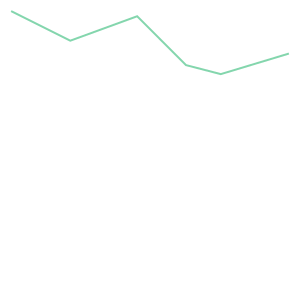

In [38]:
LineString(np.flip(ar, axis=1))

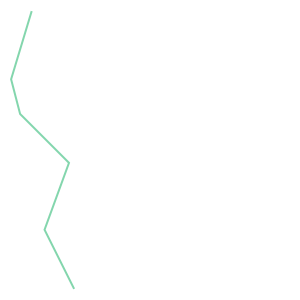

In [27]:
LineString(sl.data[-1])

In [24]:
pl.data

array([[14000.94095578, 13048.27649683],
       [15017.76753208, 10453.61557799],
       [15052.83051747,  9366.66303091],
       [13965.87797039,  8980.97019162],
       [13369.80721876,  9647.16691403],
       [12107.53974473,  8700.4663085 ],
       [16735.85381617, 19149.23595464],
       [13755.50005805, 20376.44044328]])

In [15]:
pl.scale

array([0.2125, 0.2125])

In [13]:
def test(scale_param = None):
    global scale
    if scale_param is None:
        scale = "hello"
    else:
        scale = scale_param

In [15]:
pl.data

array([[4633.618086  , 2611.18039549]])

In [17]:
ll.data

array([[4633.618086  , 2612.71413837]])

In [21]:
pl.scale

array([0.2125, 0.2125])

In [22]:
ll.scale_factor

9.273792257053264

In [23]:
ll.scale

array([0.2125, 0.2125])

In [22]:
data

InSituData
Method:		Xenium
Slide ID:	0001879
Sample ID:	Replicate 1
Path:		C:\Users\ge37voy\Github\InSituPy\notebooks\demo_dataset\demo_insitupy_project
Metadata file:	.ispy
    ➤ images
       nuclei:	(25778, 35416)
       CD20:	(25778, 35416)
       HER2:	(25778, 35416)
       HE:	(25778, 35416, 3)
    ➤ cells
       matrix
           AnnData object with n_obs × n_vars = 167780 × 313
           obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'annotation-demo', 'annotation-demo2', 'dist_from_points'
           var: 'gene_ids', 'feature_types', 'genome'
           obsm: 'spatial'
           varm: 'binned_expression'
       boundaries
           BoundariesData object with 2 entries:
               cellular
               nuclear
    ➤ annotations
       TestKey:	10 annotations, 2 classes ('TestClass','test') 

In [9]:
data.show()

Invalid schema for package 'ome-types', please run 'npe2 validate ome-types' to check for manifest errors.


In [24]:
data.store_annotations()

Added 3 new annotations to key 'TestKey'
Added 12 new annotations to existing key 'TestKey'


In [25]:
data

InSituData
Method:		Xenium
Slide ID:	0001879
Sample ID:	Replicate 1
Path:		C:\Users\ge37voy\Github\InSituPy\notebooks\demo_dataset\demo_insitupy_project
Metadata file:	.ispy
    ➤ images
       nuclei:	(25778, 35416)
       CD20:	(25778, 35416)
       HER2:	(25778, 35416)
       HE:	(25778, 35416, 3)
    ➤ cells
       matrix
           AnnData object with n_obs × n_vars = 167780 × 313
           obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'annotation-demo', 'annotation-demo2', 'dist_from_points'
           var: 'gene_ids', 'feature_types', 'genome'
           obsm: 'spatial'
           varm: 'binned_expression'
       boundaries
           BoundariesData object with 2 entries:
               cellular
               nuclear
    ➤ annotations
       TestKey:	15 annotations, 2 classes ('TestClass','test') 

In [61]:
data.annotations

annotations
TestKey:	15 annotations, 2 classes ('TestClass','test') 

In [28]:
df = data.annotations.TestKey

In [30]:
data.annotations

{'TestKey': {'n_annotations': 15,
  'classes': ['TestClass', 'test'],
  'analyzed': ''}}

In [58]:
a = data.annotations.copy()

In [59]:
a.remove_data("TestKey")

In [60]:
a

annotations

In [54]:
delattr(a, "TestKey")

In [56]:
a._update_metadata()

In [57]:
a

annotations

In [52]:
a.metadata

{'TestKey': {'n_annotations': 15,
  'classes': ['TestClass', 'test'],
  'analyzed': ''}}

In [46]:
del a.TestKey

In [47]:
a._update_metadata()

Remove TestKey


In [49]:
a.metadata

{}

In [41]:
l = list("abcd")

In [43]:
m = l.pop("b")

TypeError: 'str' object cannot be interpreted as an integer

In [38]:
a.metadata

{'TestKey': {'n_annotations': 15,
  'classes': ['TestClass', 'test'],
  'analyzed': ''}}

In [29]:
df

,objectType,geometry,name,color,origin
id,,,,,
f711ab03-4d01-4957-9862-372562a1e282,annotation,"POLYGON ((12581.72268 13023.89770, 12232.59168...",TestClass,"[255, 0, 0]",manual
dd2f9644-348d-418e-b2a6-c84b5e430466,annotation,"POLYGON ((9352.26098 11016.39449, 8784.92312 1...",TestClass,"[255, 0, 0]",manual
69663707-dc64-4175-9c7c-33f3c7d56992,annotation,"POLYGON ((20786.30104 9008.89127, 20786.30104 ...",TestClass,"[255, 0, 0]",manual
b3fe1f6a-67eb-4348-839b-3cd4febcd4c0,annotation,POINT (2611.18040 4633.61809),test,"[0, 0, 255]",manual
1d64bcdc-d507-4f1d-ba20-6ae1f621c80d,annotation,POINT (8965.29493 13650.02655),test,"[0, 0, 255]",manual
29bd1c3d-5e88-4a7c-be1f-89d263cc3e87,annotation,POINT (9486.43775 13312.81648),test,"[0, 0, 255]",manual
3c2736f8-f4e2-44ed-a2e6-4e19dff1ff9a,annotation,POINT (8643.41260 12147.90900),test,"[0, 0, 255]",manual
e2932209-4eba-4231-acba-12f9c34aa210,annotation,POINT (13088.45431 13910.59796),test,"[0, 0, 255]",manual
976a143f-c8bc-45ef-92b7-345587a2807d,annotation,POINT (9271.84953 15121.48863),test,"[0, 0, 255]",manual


In [ ]:
df.distance

In [10]:
data

InSituData
Method:		Xenium
Slide ID:	0001879
Sample ID:	Replicate 1
Path:		C:\Users\ge37voy\Github\InSituPy\notebooks\demo_dataset\demo_insitupy_project
Metadata file:	.ispy
    ➤ images
       nuclei:	(25778, 35416)
       CD20:	(25778, 35416)
       HER2:	(25778, 35416)
       HE:	(25778, 35416, 3)
    ➤ cells
       matrix
           AnnData object with n_obs × n_vars = 167780 × 313
           obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'annotation-demo', 'annotation-demo2', 'dist_from_points'
           var: 'gene_ids', 'feature_types', 'genome'
           obsm: 'spatial'
           varm: 'binned_expression'
       boundaries
           BoundariesData object with 2 entries:
               cellular
               nuclear
    ➤ annotations
       Test Key:	3 annotations, 2 classes ('Test Class','sdfs') 

In [14]:
data.annotations.get("Test Key")

,objectType,geometry,name,color,origin
id,,,,,
30d839fb-63d9-4905-a04b-a57aed200ebf,annotation,"POLYGON ((2283.56462 2874.27129, 2272.72741 29...",Test Class,"[255, 0, 0]",manual
500d4b01-cf1b-4b04-aab0-41214043339f,annotation,"POLYGON ((3811.61109 2549.15502, 3887.47156 31...",Test Class,"[255, 0, 0]",manual
NaN,annotation,POINT (1492.44837 1974.78294),sdfs,"[0, 0, 255]",manual


In [11]:
data

InSituData
Method:		Xenium
Slide ID:	0001879
Sample ID:	Replicate 1
Path:		C:\Users\ge37voy\Github\InSituPy\notebooks\demo_dataset\demo_insitupy_project
Metadata file:	.ispy
    ➤ images
       nuclei:	(25778, 35416)
       CD20:	(25778, 35416)
       HER2:	(25778, 35416)
       HE:	(25778, 35416, 3)
    ➤ cells
       matrix
           AnnData object with n_obs × n_vars = 167780 × 313
           obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'annotation-demo', 'annotation-demo2', 'dist_from_points'
           var: 'gene_ids', 'feature_types', 'genome'
           obsm: 'spatial'
           varm: 'binned_expression'
       boundaries
           BoundariesData object with 2 entries:
               cellular
               nuclear
    ➤ annotations
       Test Key:	3 annotations, 1 class ('Test Class') 

In [9]:
l = data.viewer.layers["*Test Class (Test Key)"]
s = data.viewer.layers["*test (Test Key)"]

In [10]:
s.properties

{'uid': array(['4dbd5fe7-60a7-4642-b995-acd27b162b23',
        'e91fcdf7-883e-49d4-a1d1-cc6312a5856b'], dtype=object)}

In [15]:
l.data

array([[3103.77434833, 2117.49644727],
       [2577.26316608, 2608.10913982],
       [3223.43598066, 3122.65415883],
       [3977.30426433, 2763.66926185],
       [3630.28553058, 2273.0565693 ],
       [4192.69520252, 2117.49644727],
       [3163.60516449, 2296.98889576],
       [2445.63537052, 2572.21065012]])

In [17]:
from shapely import Point

In [ ]:
Point()

In [18]:
s.properties

{'uid': array(['54fc3ba4-4139-4bfc-911b-7a84f24bdb77',
        'fc17b968-ffe8-45db-8be9-a72ece954b9c',
        'ae937f31-4d33-488d-a2a1-4b75ec7e7d8c'], dtype=object)}

In [19]:
l.properties

{'uid': array([nan, nan, nan, nan, nan, nan, nan, nan], dtype=object)}

In [16]:
type(data.viewer.layers["Points"])

napari.layers.points.points.Points

In [17]:
import napari

In [20]:
l = data.viewer.layers["Shapes"]
isinstance(l, napari.layers.Shapes)

True

In [21]:
l = data.viewer.layers["Points"]
isinstance(l, napari.layers.Points)

True

In [12]:
calc_distance_from(data, layer_name="Points")

Save distances to `.cells.matrix.obs["dist_from_Points"]`


In [13]:
data.cells.matrix.obs

,transcript_counts,control_probe_counts,control_codeword_counts,total_counts,cell_area,nucleus_area,annotation-demo,annotation-demo2,dist_from_points,dist_from_Points
1,28,1,0,29,58.387031,26.642188,NaN,NaN,2430.108111,2796.217039
2,94,0,0,94,197.016719,42.130781,NaN,NaN,2437.209760,2803.844133
3,9,0,0,9,16.256250,12.688906,NaN,NaN,2424.432420,2790.569064
4,11,0,0,11,42.311406,10.069844,NaN,NaN,2432.471467,2799.226017
5,48,0,0,48,107.652500,37.479688,NaN,NaN,2427.070861,2793.394574
...,...,...,...,...,...,...,...,...,...,...
167776,229,1,0,230,220.452813,60.599688,NaN,NaN,1288.446510,5122.486209
167777,79,0,0,79,37.389375,25.242344,NaN,NaN,1308.526830,5146.794504
167778,397,0,0,397,287.058281,86.700000,NaN,NaN,1302.580629,5137.612049
167779,117,0,0,117,235.354375,25.197188,NaN,NaN,1314.475574,5148.485700


In [19]:
data.path

WindowsPath('../demo_dataset/demo_insitupy_project')

In [20]:
data.save()

Updating project in c:\Users\ge37voy\Github\InSituPy\notebooks\demo_dataset\demo_insitupy_project
	Updating cells...
Saved.
Reloading following modalities: cells,images
Loading cells...
	No alternative cells found...
Loading images...


In [18]:
from insitupy.plotting.expression_along_axis import expr_along_obs_val

In [20]:
data = expr_along_obs_val(adata=data.cells.matrix,
                   keys="ACTA2",
                   x_category="dist_from_points", groupby=None, return_data=True,
                   stderr=False, nsteps=10
                   )

In [21]:
data

x    y_pred    std
key                                       
ACTA2 None 0   354.693428  2.084774  False
           1   706.606128  1.922362  False
           2  1058.518828  1.881677  False
           3  1410.431528  1.866302  False
           4  1762.344228  2.026653  False
           5  2114.256927  1.849244  False
           6  2466.169627  1.562058  False
           7  2818.082327  1.168777  False

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


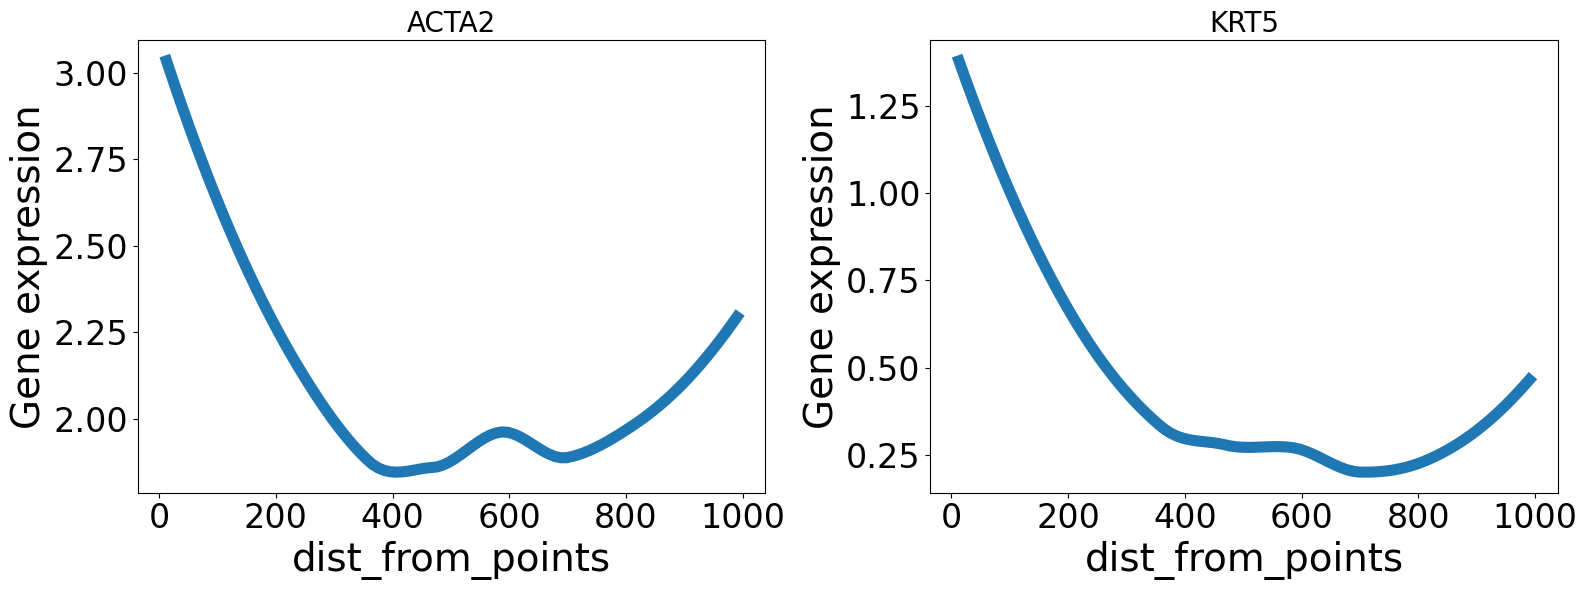

In [22]:
expr_along_obs_val(adata=data.cells.matrix,
                   keys=["ACTA2", "KRT5"],
                   x_category="dist_from_points", groupby=None, return_data=False,
                   stderr=False, nsteps=100, plot_legend=False, xmax=1000
                   )

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


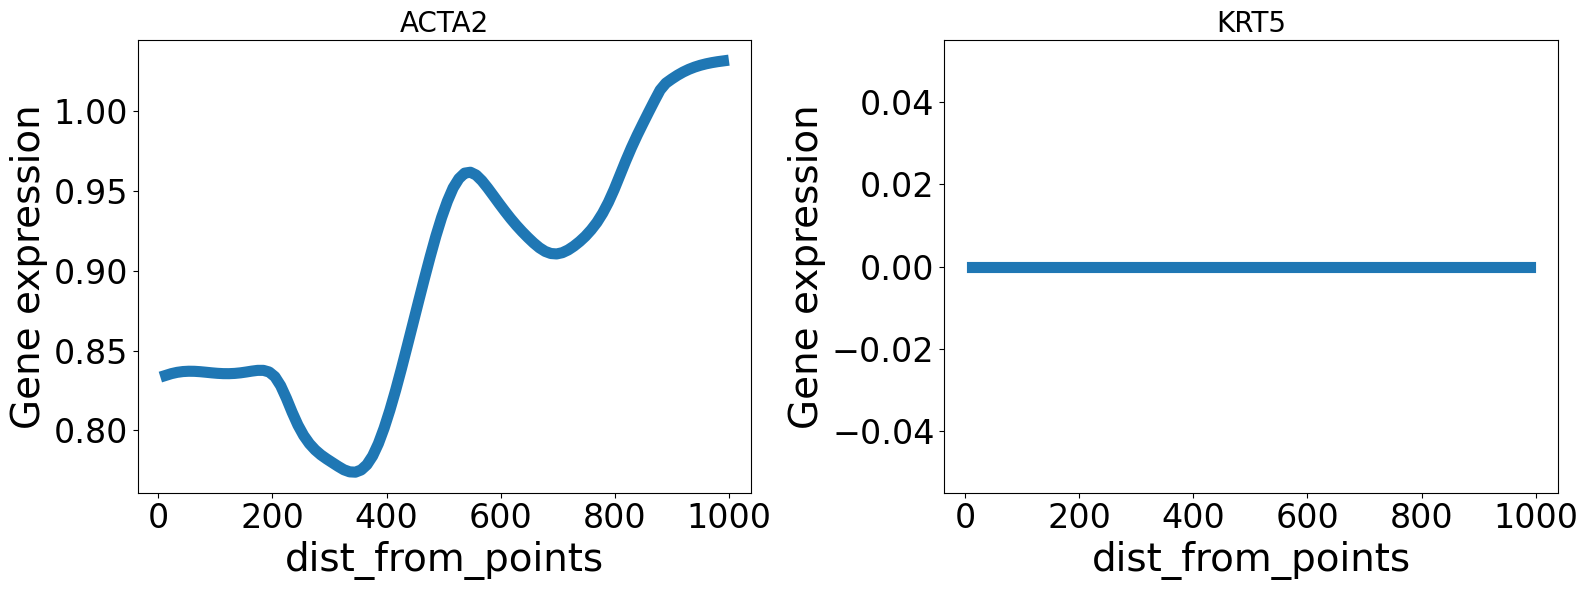

In [23]:
expr_along_obs_val(adata=data.cells.matrix,
                   keys=["ACTA2", "KRT5"], x_category="dist_from_points",
                   groupby=None, return_data=False,
                   method="lowess", stderr=False,
                   nsteps=100, plot_legend=False, xmax=1000
                   )

## Problems

1. `loess` makes the kernel crash when calculating the stderr
2. `lowess` custom function takes extremely low when calculating the stderr and when skipping stderr also takes very long plus produces weird results.

## Possible solution
1. use `loess` with custom bootstrapping as done in the custom `lowess` function. Should work definitely and not take too long since the `loess` prediction seems to be very fast.

In [ ]:
expr_along_obs_val(adata=data.cells.matrix,
                   keys=["ACTA2", "KRT5"], x_category="dist_from_points",
                   groupby=None, return_data=False,
                   method="lowess", stderr=True,
                   nsteps=100, plot_legend=False, xmax=1000
                   )

KeyboardInterrupt: 

Exception ignored in: 'statsmodels.nonparametric._smoothers_lowess.calculate_weights'
Traceback (most recent call last):
  File "c:\Users\ge37voy\AppData\Local\miniconda3\envs\insitupy\lib\site-packages\numpy\core\fromnumeric.py", line 2172, in _sum_dispatcher
    def _sum_dispatcher(a, axis=None, dtype=None, out=None, keepdims=None,
KeyboardInterrupt: 


<Axes: xlabel='x'>

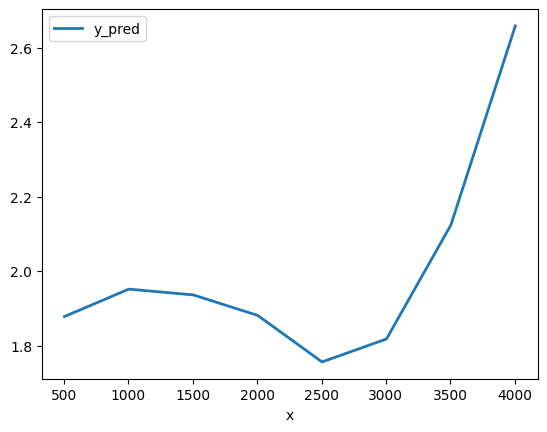

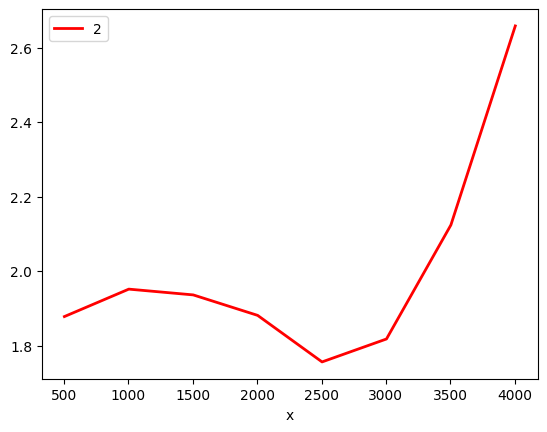

In [41]:
data.plot(kind="line", x="x", y="y_pred", label=None, color=None, linewidth=2)
data.plot(kind="line", x="x", y="y_pred", label="2", color="red", linewidth=2)

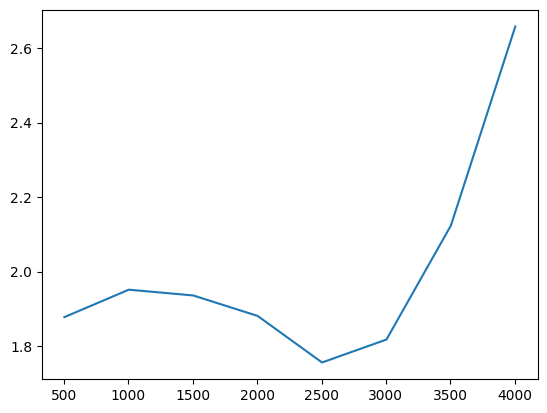

In [32]:
plt.plot(data["x"], data["y_pred"])

In [30]:
data.columns

Index(['x', 'y_pred', 'std', 'conf_lower', 'conf_upper'], dtype='object')

In [23]:
data

x    y_pred    std  conf_lower  conf_upper
key                                                               
ACTA2 None 0   504.257656  1.877883  False         NaN         NaN
           1  1004.245360  1.951516  False         NaN         NaN
           2  1504.233064  1.936031  False         NaN         NaN
           3  2004.220768  1.881070  False         NaN         NaN
           4  2504.208473  1.756132  False         NaN         NaN
           5  3004.196177  1.817721  False         NaN         NaN
           6  3504.183881  2.123669  False         NaN         NaN
           7  4004.171585  2.658033  False         NaN         NaN

In [27]:
ls, xs_pred = data

In [30]:
pred =  ls.predict(xs_pred, stderror=False)

: 

In [29]:
pred.stderr

ValueError: Standard error was not computed.Use 'stderror=True' when predicting.

In [24]:
data.stderr

ValueError: Standard error was not computed.Use 'stderror=True' when predicting.

In [23]:
data

x    y_pred    std  conf_lower  conf_upper
key                                                               
ACTA2 None 0   479.806029  2.100595  False         NaN         NaN
           1   958.483608  1.943201  False         NaN         NaN
           2  1437.161187  1.921318  False         NaN         NaN
           3  1915.838766  1.826385  False         NaN         NaN
           4  2394.516345  1.634902  False         NaN         NaN
           5  2873.193924  1.797144  False         NaN         NaN
           6  3351.871503  2.273278  False         NaN         NaN
           7  3830.549082  3.041486  False         NaN         NaN

In [33]:
xs

NameError: name 'xs' is not defined

ValueError: setting an array element with a sequence.

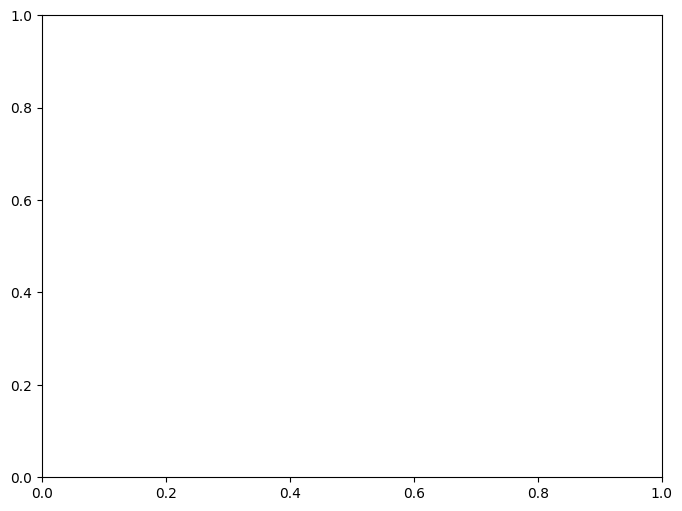

In [ ]:
expr_along_obs_val(adata=data.cells.matrix,
                   keys="ACTA2",
                   x_category="dist_from_points", groupby=None
                   )

ValueError: setting an array element with a sequence.

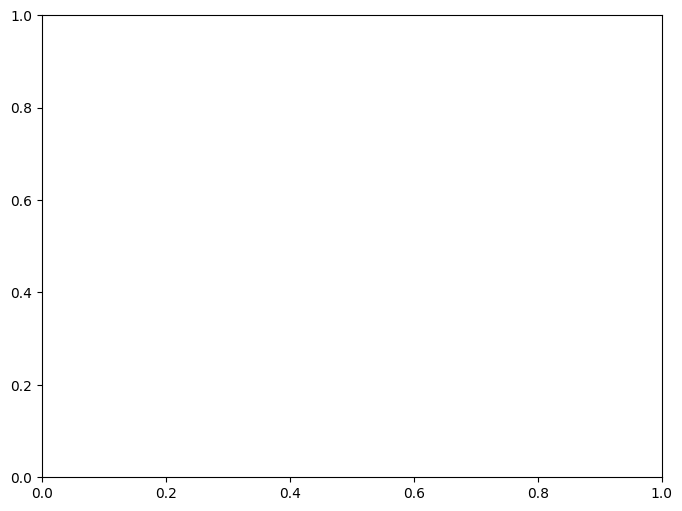

In [ ]:
expr_along_obs_val(adata=data.cells.matrix,
                   keys="ACTA2",
                   x_category="dist_from_points", groupby=None
                   )

In [ ]:
a

In [19]:
dists.shape

(8, 167780)

In [13]:
points

<GeometryArray>
[<POINT (1910.078 2939.854)>, <POINT (2054.715 2852.311)>,
 <POINT (1872.015 2585.873)>, <POINT (1970.978 3210.098)>,
 <POINT (2225.996 3164.423)>,  <POINT (2069.94 3377.573)>,
  <POINT (2770.289 2974.11)>, <POINT (5278.293 1273.736)>]
Length: 8, dtype: geometry

In [12]:
dist.min()

10.316043603539608

In [91]:
dist

array([2840.97583443, 2847.16676686, 2835.26350056, ..., 5964.1267676 ,
       5974.66129396, 5983.51357957])

In [92]:
from shapely import LineString

In [93]:
ll.data[0]

array([[ 7264.325411  , 28308.07095047],
       [ 7743.80240649, 27436.29459505],
       [ 9182.23339293, 26491.87021001],
       [10577.0755616 , 24922.67277026],
       [11812.09206511, 23992.77799114],
       [13250.52305156, 23760.30429636]])

In [94]:
line_coords_xy = np.flip(ll.data[0], axis=1) * pixel_size

In [95]:
line = LineString(line_coords_xy)

In [96]:
cells.distance(line)

array([4779.33797023, 4797.11646734, 4775.46252531, ..., 3341.75590766,
       3353.85023477, 3358.49688704])

In [97]:
data.cells.matrix.obs["line"] = cells.distance(line)
data.cells.matrix.obs["line2"] = cells.distance(line)**2

In [82]:
data.show()

In [99]:
adata = data.cells.matrix

In [100]:
adata

AnnData object with n_obs × n_vars = 167780 × 313
    obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'annotation-demo', 'annotation-demo2', 'line', 'line2'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'
    varm: 'binned_expression'

In [102]:
adata.X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [4., 1., 5., ..., 0., 0., 3.],
       [1., 0., 0., ..., 0., 0., 0.],
       [4., 1., 3., ..., 0., 0., 0.]], dtype=float32)

In [103]:
adata.obs

,transcript_counts,control_probe_counts,control_codeword_counts,total_counts,cell_area,nucleus_area,annotation-demo,annotation-demo2,line,line2
1,28,1,0,29,58.387031,26.642188,NaN,NaN,4779.337970,2.284207e+07
2,94,0,0,94,197.016719,42.130781,NaN,NaN,4797.116467,2.301233e+07
3,9,0,0,9,16.256250,12.688906,NaN,NaN,4775.462525,2.280504e+07
4,11,0,0,11,42.311406,10.069844,NaN,NaN,4796.173524,2.300328e+07
5,48,0,0,48,107.652500,37.479688,NaN,NaN,4781.829921,2.286590e+07
...,...,...,...,...,...,...,...,...,...,...
167776,229,1,0,230,220.452813,60.599688,NaN,NaN,3328.190758,1.107685e+07
167777,79,0,0,79,37.389375,25.242344,NaN,NaN,3346.342668,1.119801e+07
167778,397,0,0,397,287.058281,86.700000,NaN,NaN,3341.755908,1.116733e+07
167779,117,0,0,117,235.354375,25.197188,NaN,NaN,3353.850235,1.124831e+07


In [104]:
adata.var

,gene_ids,feature_types,genome
ABCC11,ENSG00000121270,Gene Expression,Unknown
ACTA2,ENSG00000107796,Gene Expression,Unknown
ACTG2,ENSG00000163017,Gene Expression,Unknown
ADAM9,ENSG00000168615,Gene Expression,Unknown
ADGRE5,ENSG00000123146,Gene Expression,Unknown
...,...,...,...
VWF,ENSG00000110799,Gene Expression,Unknown
WARS,ENSG00000140105,Gene Expression,Unknown
ZEB1,ENSG00000148516,Gene Expression,Unknown
ZEB2,ENSG00000169554,Gene Expression,Unknown


In [44]:
data.store_annotations()

Added 1 new annotations to key 'test'


In [46]:
data.annotations.test

,objectType,geometry,name,color,origin
id,,,,,
5af017cc-02a8-4644-8687-7f07f4591693,annotation,"POLYGON ((6021.63193 1559.75951, 5801.00825 16...",blubb,"[255, 0, 0]",manual


In [47]:
data.show()

In [42]:
data

InSituData
Method:		Xenium
Slide ID:	0001879
Sample ID:	Replicate 1
Path:		C:\Users\ge37voy\Github\InSituPy\notebooks\demo_dataset\demo_insitupy_project
Metadata file:	.ispy
    ➤ images
       nuclei:	(25778, 35416)
       CD20:	(25778, 35416)
       HER2:	(25778, 35416)
       HE:	(25778, 35416, 3)
    ➤ cells
       matrix
           AnnData object with n_obs × n_vars = 167780 × 313
           obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'annotation-demo', 'annotation-demo2'
           var: 'gene_ids', 'feature_types', 'genome'
           obsm: 'spatial'
           varm: 'binned_expression'
       boundaries
           BoundariesData object with 2 entries:
               cellular
               nuclear

In [62]:
l = data.viewer.layers["Shapes"]
l2 = data.viewer.layers["*blubb (test)"]
p = data.viewer.layers["Points"]

In [56]:
l.shape_type

['path']

In [58]:
l2.shape_type

['polygon', 'polygon', 'path']

In [60]:
type(l2)

napari.layers.shapes.shapes.Shapes

In [61]:
type(l)

napari.layers.shapes.shapes.Shapes

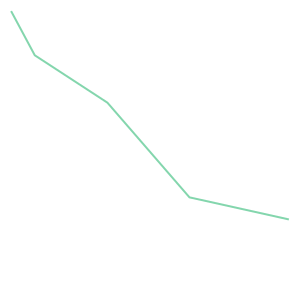

In [34]:
LineString(ll.data[0])

In [17]:
ll.data[0]

array([[ 7282.3753437 , 28338.57000552],
       [ 7817.66894886, 27339.35527589],
       [ 9459.23600467, 26268.76806558],
       [11314.92050255, 24127.59364495],
       [13563.15364421, 23627.98628013]])

In [22]:
ll.data[0][:, 0]

array([ 7282.3753437 ,  7817.66894886,  9459.23600467, 11314.92050255,
       13563.15364421])

In [24]:
s = gpd.points_from_xy(ll.data[0][:, 1], ll.data[0][:, 0])

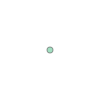

In [25]:
s[0]